In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator, math, statistics
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
import seaborn as sb
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("futbol.csv", parse_dates= True, index_col= 1)

In [3]:
dataset = np.array(df.filter(["Nationality","Club","Overall","Potential","Value","Wage"]).values)

In [4]:
unique, counts = np.unique(dataset[:,0], return_counts=True)
diccionario = dict(zip(unique, counts))

In [5]:
#Creación de variables usadas para el marco de datos normalizedDataset
robustCount = MinMaxScaler().fit_transform(np.array(list(diccionario.values())).reshape(-1,1)).flat[:]
robustCountNormalized = ((robustCount - min(robustCount).reshape(-1,1))*.8).flat[:]
mean = [statistics.geometric_mean(df[df["Nationality"]==pais]["Overall"])for pais in list(diccionario.keys())]
robustMean = (MinMaxScaler().fit_transform(np.array(mean).reshape(-1,1))).flat[:]
robustMeanNormalized = (robustMean - min(robustMean).reshape(-1,1)).flat[:]

In [6]:
#Creación del mejor país simulado
target = max(robustCountNormalized), max(robustMeanNormalized)
target

(0.8, 1.0)

In [7]:
normalizedDataset = pd.DataFrame(data={'Nationality':list(diccionario.keys()), 'Count': diccionario.values(),               
                                        'RobustCount': robustCount, 
                                       'RobustCountNormalized': robustCountNormalized,
                                           "Mean": mean, 'RobustMean': robustMean,
                                           'RobustMeanNormalized': robustMeanNormalized
                                      })

In [8]:
#Agregando columna de distancias a normalizedDataset
normalizedDataset = normalizedDataset.assign(Distance=[math.sqrt((target[0]-row['RobustCountNormalized'])**2+
                                    (target[1]-row["RobustMeanNormalized"])**2)
                                    for index,row in normalizedDataset.iterrows()])

In [9]:
normalizedDataset

,Nationality,Count,RobustCount,RobustCountNormalized,Mean,RobustMean,RobustMeanNormalized,Distance
0,Afghanistan,4,0.001806,0.001445,60.979502,0.237119,0.237119,1.104390
1,Albania,40,0.023480,0.018784,65.643606,0.459219,0.459219,0.950128
2,Algeria,60,0.035521,0.028417,70.413136,0.686340,0.686340,0.832901
3,Andorra,1,0.000000,0.000000,62.000000,0.285714,0.285714,1.072476
4,Angola,15,0.008429,0.006743,67.412946,0.543474,0.543474,0.915245
...,...,...,...,...,...,...,...,...
159,Uzbekistan,2,0.000602,0.000482,67.082039,0.527716,0.527716,0.928591
160,Venezuela,67,0.039735,0.031788,67.010486,0.524309,0.524309,0.903566
161,Wales,129,0.077062,0.061650,63.780779,0.370513,0.370513,0.970265
162,Zambia,9,0.004816,0.003853,65.073999,0.432095,0.432095,0.977940


In [10]:
normalizedDataset.sort_values('Distance', ascending=True).head(n=15)

,Nationality,Count,RobustCount,RobustCountNormalized,Mean,RobustMean,RobustMeanNormalized,Distance
139,Spain,1072,0.644792,0.515834,69.399849,0.638088,0.638088,0.460142
20,Brazil,827,0.497291,0.397833,71.032826,0.715849,0.715849,0.492423
6,Argentina,937,0.563516,0.450813,68.294150,0.585436,0.585436,0.542029
59,Germany,1198,0.720650,0.576520,65.758510,0.464691,0.464691,0.580085
55,France,914,0.549669,0.439735,67.438628,0.544697,0.544697,0.580596
78,Italy,702,0.422035,0.337628,67.842462,0.563927,0.563927,0.635569
46,England,1662,1.000000,0.800000,63.067219,0.336534,0.336534,0.663466
123,Portugal,322,0.193257,0.154606,71.137432,0.720830,0.720830,0.703185
108,Netherlands,453,0.272125,0.217700,67.383009,0.542048,0.542048,0.740806
31,Colombia,618,0.371463,0.297170,65.263305,0.441110,0.441110,0.751795


In [11]:
normalizedDataset.sort_values('Distance', ascending=False).head(n=60)

,Nationality,Count,RobustCount,RobustCountNormalized,Mean,RobustMean,RobustMeanNormalized,Distance
19,Botswana,1,0.000000,0.000000,56.000000,0.000000,0.000000,1.280625
74,Indonesia,1,0.000000,0.000000,56.000000,0.000000,0.000000,1.280625
73,India,30,0.017459,0.013967,58.578636,0.122792,0.122792,1.177854
138,South Sudan,1,0.000000,0.000000,60.000000,0.190476,0.190476,1.138125
14,Belize,1,0.000000,0.000000,60.000000,0.190476,0.190476,1.138125
70,Hong Kong,2,0.000602,0.000482,60.481402,0.213400,0.213400,1.121592
98,Malta,1,0.000000,0.000000,61.000000,0.238095,0.238095,1.104762
0,Afghanistan,4,0.001806,0.001445,60.979502,0.237119,0.237119,1.104390
67,Guyana,3,0.001204,0.000963,61.571007,0.265286,0.265286,1.085479
140,St Kitts Nevis,3,0.001204,0.000963,61.673623,0.270173,0.270173,1.082177


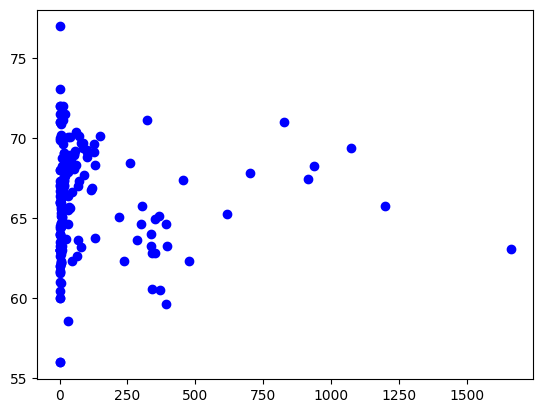

In [12]:


plt.scatter(normalizedDataset['Count'],normalizedDataset['Mean'], color='b')

plt.show()

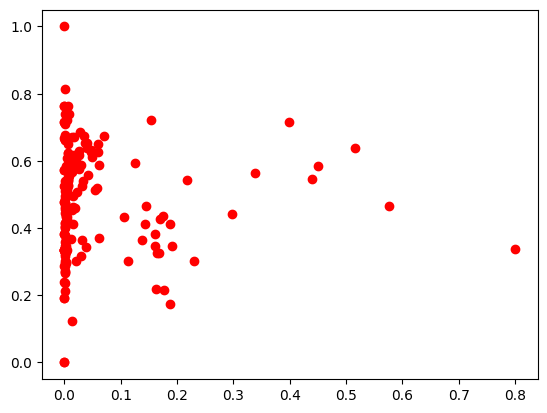

In [13]:
    plt.scatter(normalizedDataset["RobustCountNormalized"].values, normalizedDataset["RobustMeanNormalized"].values, color='r')
plt.show()